<div class="alert alert-block alert-info">
<b>Analise da tabela de crimes 2016</b>
</div>

<div class="alert alert-block alert-info">
<b>Turma 3ECR</b>
</div>

<div class="alert alert-block alert-info">
<b>Grupo:</b>
    
Alex Matos    RM: 79318

Axel Lafuente Gutierrez RM: 80023

Guilherme Condini RM: 79993

Larissa Toledo RM: 81130

Rodrigo Kenji RM: 80584
</div>

Para fazer esta analise, primeiro começamos fazendo um import das bibliotecas Python


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

Agora, importamos os arquivos csv para o notebook:


In [3]:
tab_desc = pd.read_csv("crimes_2016-desc.csv")
tab = pd.read_csv("crimes_2016.csv")

/root/anaconda3/envs/fiap-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Agora vemos seus conteudos, para que possamos entender com que dados iremos trabalhar


In [4]:
tab_desc

,NUM_BO,Ano da ocorrencia
0,ANO_BO,Número do BO
1,ID_DELEGACIA,Código da delegacia responsável pelo registro ...
2,NOME_DEPARTAMENTO,Departamento responsável pelo registro
3,NOME_SECCIONAL,Delegacia Seccional responsável pelo registro
4,DELEGACIA,Delegacia responsável pelo registro
5,NOME_DEPARTAMENTO_CIRC,Departamento responsável pela área onde houve ...
6,NOME_SECCIONAL_CIRC,Delegacia Seccional responsável pela área onde...
7,NOME_DELEGACIA_CIRC,Delegacia responsável pela área onde houve a o...
8,ANO,Ano do registro
9,MES,mês do registro


In [5]:
tab

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,FLAG_STATUS,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1
0,10957,2016,20249,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,2016,...,C,A.I.-Furto (art. 155),NaN,RESIDENCIA,-23.594489,-46.482766,S.PAULO,RUA ANDRE DE ALMEIDA,1260,C
1,1672,2016,20230,DECAP,DEL.SEC.5º LESTE,30º D.P. TATUAPE,DECAP,DEL.SEC.5º LESTE,30º D.P. TATUAPE,2016,...,C,Roubo (art. 157),NaN,TRANSEUNTE,-23.542544,-46.561665,S.PAULO,RUA MONTE SERRAT,500,C
2,211,2016,10376,DECAP,DEL.SEC.3º OESTE,09ª DEL.DEF.MUL. OESTE,DECAP,DEL.SEC.3º OESTE,87º D.P. V. P. BARRETO,2016,...,C,Lesão corporal (art 129 § 9º),NaN,NaN,-23.481277,-46.718199,S.PAULO,AVENIDA COMENDADOR FEIZ ZARZUR,100,C
3,4438,2016,10323,DECAP,DEL.SEC.3º OESTE,23º D.P. PERDIZES,DECAP,DEL.SEC.3º OESTE,23º D.P. PERDIZES,2016,...,C,Lesão corporal (art. 129),NaN,NaN,-23.531843,-46.664163,S.PAULO,AVENIDA FRANCISCO MATARAZZO,1028,C
4,676155,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.1º CENTRO,04º D.P. CONSOLAÇÃO,2016,...,C,Furto (art. 155),NaN,TRANSEUNTE,-23.553752,-46.658809,S.PAULO,RUA BELA CINTRA,670,C
5,358304,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.1º CENTRO,78º D.P. JARDINS,2016,...,C,Furto (art. 155),NaN,TRANSEUNTE,-23.562582,-46.654976,S.PAULO,AVENIDA PAULISTA,1450,C
6,1029318,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.8º SAO MATEUS,41º D.P. VILA RICA,2016,...,C,Roubo (art. 157),NaN,TRANSEUNTE,-23.581767,-46.534650,S.PAULO,AV. ANTÔNIO BUONO,148,C
7,1105692,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.6º SANTO AMARO,92º D.P. P. STO ANTONIO,2016,...,C,Roubo (art. 157),NaN,VEICULO,-23.653020,-46.756272,S.PAULO,RUA BARAO NICOLINO BARRA,51,C
8,4448,2016,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,2016,...,C,Furto (art. 155),NaN,INTERIOR ESTABELECIMENTO,-23.607678,-46.637683,S.PAULO,AVENIDA JABAQUARA,1000,C
9,2589,2016,10365,DECAP,DEL.SEC.4º NORTE,90º D.P. PQ. NOVO MUNDO,DECAP,DEL.SEC.4º NORTE,90º D.P. PQ. NOVO MUNDO,2016,...,C,Furto (art. 155),NaN,VEICULO,-23.518952,-46.568874,S.PAULO,RUA SARGENTO MANOEL CHAGAS,865,C


No comando abaixo analisamos os tipos de variaveis das tabelas:

In [6]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
NUM_BO                    50000 non-null int64
ANO_BO                    50000 non-null int64
ID_DELEGACIA              50000 non-null int64
NOME_DEPARTAMENTO         50000 non-null object
NOME_SECCIONAL            50000 non-null object
DELEGACIA                 50000 non-null object
NOME_DEPARTAMENTO_CIRC    50000 non-null object
NOME_SECCIONAL_CIRC       50000 non-null object
NOME_DELEGACIA_CIRC       50000 non-null object
ANO                       50000 non-null int64
MES                       50000 non-null int64
FLAG_STATUS               50000 non-null object
RUBRICA                   50000 non-null object
DESDOBRAMENTO             1899 non-null object
CONDUTA                   42765 non-null object
LATITUDE                  47231 non-null float64
LONGITUDE                 47231 non-null float64
CIDADE                    50000 non-null object
LOGRADOURO                50000

Vemos as quantidades de linhas que iremos trabalhar e notamos uma coisa muito importante

In [7]:
len(tab)

50000

<div class="alert alert-block alert-success">
<b>Este numero já nos mostra a quantidade de BOs que temos</b>
</div>

Abaixo fazemos uma descrição da tabela, para que possamos ver quais dados podemos trabalhar

In [8]:
tab.columns

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'FLAG_STATUS', 'RUBRICA', 'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE',
       'LONGITUDE', 'CIDADE', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'FLAG_STATUS.1'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Criamos entao uma segunda tabela que conterá apenas os elementos que nos interessa, assim criamos o primeiro filtro da nossa analise:</b>
</div>

In [9]:
tmp = tab[['ANO_BO', 'MES', 'DELEGACIA', 'LOGRADOURO', 'CIDADE', 'RUBRICA', 'FLAG_STATUS']]

Aqui vemos como seu conteudo ficou disponibilizado:

In [10]:
tmp

,ANO_BO,MES,DELEGACIA,LOGRADOURO,CIDADE,RUBRICA,FLAG_STATUS
0,2016,10,49º D.P. SAO MATEUS,RUA ANDRE DE ALMEIDA,S.PAULO,A.I.-Furto (art. 155),C
1,2016,5,30º D.P. TATUAPE,RUA MONTE SERRAT,S.PAULO,Roubo (art. 157),C
2,2016,2,09ª DEL.DEF.MUL. OESTE,AVENIDA COMENDADOR FEIZ ZARZUR,S.PAULO,Lesão corporal (art 129 § 9º),C
3,2016,9,23º D.P. PERDIZES,AVENIDA FRANCISCO MATARAZZO,S.PAULO,Lesão corporal (art. 129),C
4,2016,5,DELEGACIA ELETRONICA,RUA BELA CINTRA,S.PAULO,Furto (art. 155),C
5,2016,3,DELEGACIA ELETRONICA,AVENIDA PAULISTA,S.PAULO,Furto (art. 155),C
6,2016,8,DELEGACIA ELETRONICA,AV. ANTÔNIO BUONO,S.PAULO,Roubo (art. 157),C
7,2016,8,DELEGACIA ELETRONICA,RUA BARAO NICOLINO BARRA,S.PAULO,Roubo (art. 157),C
8,2016,4,16º D.P. VILA CLEMENTINO,AVENIDA JABAQUARA,S.PAULO,Furto (art. 155),C
9,2016,8,90º D.P. PQ. NOVO MUNDO,RUA SARGENTO MANOEL CHAGAS,S.PAULO,Furto (art. 155),C


Primeiro, criamos uma mascara, para teste visualizando somente os BOs de S.PAULO

In [11]:
tmp.CIDADE == 'S.PAULO'

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: CIDADE, Length: 50000, dtype: bool

<div class="alert alert-block alert-danger">
<b>Notamos que algo não está certo, afinal esta mascara era para retornar "True" nos valores correspondentes</b>
</div>

Para resolver este problema fazemos um loc, para assim vermos como o dado está disponibilizado

In [125]:
tmp.loc[1, "CIDADE"]

'S.PAULO                                 '

<div class="alert alert-block alert-success">
<b>Nesta out podemos ver como dado está disponibilizado, assim podemos fazer a mascara de maneira correta:</b>
</div>

In [126]:
tmp.CIDADE == 'S.PAULO                                 '

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: CIDADE, Length: 50000, dtype: bool

A mascara, desta vez, respondeu de acordo, assim, a partir de agora, faremos isto com todos os dados que gostariamos de obter ou analisar

Para nos, também é interessante saber os valores distribuidos, pois como estamos trabalhando com strings, não é possivel manipulá-los como ints

<div class="alert alert-block alert-success">
<b>Para resolver este problema, usamos a funcao value_counts()</b>
</div>

In [12]:
tmp.CIDADE.value_counts()

S.PAULO                                     33168
GUARULHOS                                    2255
S.BERNARDO DO CAMPO                          1811
S.ANDRE                                      1799
OSASCO                                       1736
DIADEMA                                      1120
MAUA                                          871
CARAPICUIBA                                   704
MOGI DAS CRUZES                               615
ITAQUAQUECETUBA                               557
SUZANO                                        472
BARUERI                                       466
TABOAO DA SERRA                               436
COTIA                                         397
FERRAZ DE VASCONCELOS                         305
ITAPECERICA DA SERRA                          295
ITAPEVI                                       292
EMBU                                          291
S.CAETANO DO SUL                              275
POA                                           232


In [128]:
tmp.RUBRICA.value_counts()

Roubo (art. 157)                                                          20599
Furto (art. 155)                                                          18607
Furto qualificado (art. 155, §4o.)                                         3181
Lesão corporal (art. 129)                                                  2863
Lesão corporal culposa na direção de veículo automotor (Art. 303)          1904
Lesão corporal (art 129 § 9º)                                               837
Drogas sem autorização ou em desacordo (Art.33, caput)                      702
A.I.-Drogas sem autorização ou em desacordo (Art.33, caput)                 307
A.I.-Roubo (art. 157)                                                       233
Homicídio simples (art. 121)                                                210
A.I.-Lesão corporal (art. 129)                                              179
Lesão corporal culposa (art. 129. §6o.)                                      98
A.I.-Furto (art. 155)                   

In [129]:
tmp.ANO_BO.value_counts()

2016    49510
2017      490
Name: ANO_BO, dtype: int64

In [130]:
tmp.MES.value_counts()

3     4421
10    4387
7     4244
9     4226
11    4184
5     4176
2     4154
4     4150
12    4076
8     4031
1     3991
6     3960
Name: MES, dtype: int64

In [131]:
tmp.DELEGACIA.value_counts()

DELEGACIA ELETRONICA              17156
POLICIA MILITAR                     552
49º D.P.  SAO MATEUS                467
11º D.P. SANTO AMARO                449
16º D.P. VILA CLEMENTINO            445
                                  ...  
DEL.SEC.LIMEIRA PLANTÃO               1
03º D.P. CAMPINAS                     1
DEL.POL.CACAPAVA                      1
04º D.P. LIMEIRA                      1
DIIMA - 01ª DEL.POL.                  1
Name: DELEGACIA, Length: 415, dtype: int64

In [132]:
tmp.LOGRADOURO.value_counts()

AVENIDA PAULISTA                            334
RUA AUGUSTA                                 195
AVENIDA BRIGADEIRO FARIA LIMA               172
AVENIDA CRUZEIRO DO SUL                     157
AVENIDA SAPOPEMBA                           150
                                           ... 
RUA ORQUIDEA                                  1
RUA CUXIPONES                                 1
AVENIDA DR LUIZ GONZAGA DARTORA               1
ALAMEDA EPICEIA                               1
RUA OVIDIO COLLESI                            1
Name: LOGRADOURO, Length: 20868, dtype: int64

<div class="alert alert-block alert-info">
Desta forma, podemos coletar a quantidade de valores que nos interessam e através disso já podemos realizar algumas observações:
</div>

<div class="alert alert-block alert-success">
    Notamos que o maior numero de BOs sao de <b>roubo</b> seguido de furto
</div>

<div class="alert alert-block alert-success">
    Percebemos também que a cidade com o maior numero de registros de BOs é <b>São Paulo</b>
</div>

<div class="alert alert-block alert-success">
    Outra conclusão que podemos tirar é que nos meses de <b>Março</b> e <b>Outubro</b>
</div>

<div class="alert alert-block alert-success">
Também podemos perceber que é preferível a realização do registro de um BO pelo meio eletrônico 
</div>

No entanto, e se quisermos cruzar outros tipos de dados, como a media de furtos na avenida paulista?

<div class="alert alert-block alert-info">
Primeiramente, vemos como está disponibilizado o dado de <b>Furtos</b>
</div>

In [13]:
tmp.loc[1, "RUBRICA"]

'Roubo (art. 157)'

<div class="alert alert-block alert-info">
    Depois, fazemos o mesmo para o dado Logradouro, voltado para a <b>Avenida Paulista</b>
</div>

In [133]:
tmp.loc[5, "LOGRADOURO"]

'AVENIDA PAULISTA                        '

Após isto, criamos uma variavel que conterá o valor de BOs dentro da Avenida Paulista:

In [14]:
m1 = tmp.loc[(tmp.LOGRADOURO == "AVENIDA PAULISTA                        ") & (tmp.RUBRICA),:].count()

Abaixo vemos o seu valor:

In [15]:
m1

ANO_BO         334
MES            334
DELEGACIA      334
LOGRADOURO     334
CIDADE         334
RUBRICA        334
FLAG_STATUS    334
dtype: int64

Como maneira de conferência, podemos observar o valor acima do tmp.LOGRADOURO.value_counts()

Após isto, cruzamos os dados da Avenida Paulista e o numero de Furtos nesta área:

In [16]:
m2 = tmp.loc[(tmp.LOGRADOURO == "AVENIDA PAULISTA                        ") & (tmp.RUBRICA=="Furto (art. 155)"),:].count()

Assim como o anterior, vemos qual é o seu resultado:

In [17]:
m2

ANO_BO         272
MES            272
DELEGACIA      272
LOGRADOURO     272
CIDADE         272
RUBRICA        272
FLAG_STATUS    272
dtype: int64

<div class="alert alert-block alert-success">
Por ultimo, tiramos a sua média e imprmimos esse valor:
</div>

In [18]:
media_furtos_AvPaulista = m1/m2

In [19]:
media_furtos_AvPaulista

ANO_BO         1.227941
MES            1.227941
DELEGACIA      1.227941
LOGRADOURO     1.227941
CIDADE         1.227941
RUBRICA        1.227941
FLAG_STATUS    1.227941
dtype: float64

<div class="alert alert-block alert-info">
Em seguida, gostariamos de saber quais seriam as cidades que possuem o numero de BOs acima da media
</div>

Primeiro, criamos uma variavel que conterá o valor de BOs de cada cidade:

In [26]:
var_ci_count = tmp.CIDADE.value_counts()

Em seguida vemos qual é o valor contido nesta variável:

In [27]:
var_ci_count

S.PAULO                                     33168
GUARULHOS                                    2255
S.BERNARDO DO CAMPO                          1811
S.ANDRE                                      1799
OSASCO                                       1736
DIADEMA                                      1120
MAUA                                          871
CARAPICUIBA                                   704
MOGI DAS CRUZES                               615
ITAQUAQUECETUBA                               557
SUZANO                                        472
BARUERI                                       466
TABOAO DA SERRA                               436
COTIA                                         397
FERRAZ DE VASCONCELOS                         305
ITAPECERICA DA SERRA                          295
ITAPEVI                                       292
EMBU                                          291
S.CAETANO DO SUL                              275
POA                                           232


Após isto, criamos a media de BOs da cidade em funçao das Rubricas:

In [24]:
var_med = tmp.groupby("CIDADE").count()["RUBRICA"].mean()

E logo em seguida imprimimos esta variavel:

In [25]:
var_med

1190.4761904761904

<div class="alert alert-block alert-info">
Para que possamos fazer esta analise, criamos uma mascara que comparará a primeira variavel criada com a segunda:
</div>

In [29]:
mask = var_ci_count > var_med

Logo em seguida colocamos esta mascara num loc para apresentar apenas os dados que nos interessa:

In [32]:
mask.loc[mask]

S.PAULO                                     True
GUARULHOS                                   True
S.BERNARDO DO CAMPO                         True
S.ANDRE                                     True
OSASCO                                      True
Name: CIDADE, dtype: bool

<div class="alert alert-block alert-success">
Assim observamos que as cidades com indices de BOs maiores que a média são:
    
   <b>São Paulo</b>
    
   <b>Guarulhos</b>
    
   <b>São Bernardo do Campo</b>
    
   <b>Santo Andre</b>
    
   <b>Osasco</b>
    
</div>

Por ultimo, plotamos um grafico que analisa o numero de BOs em funcao das cidades:

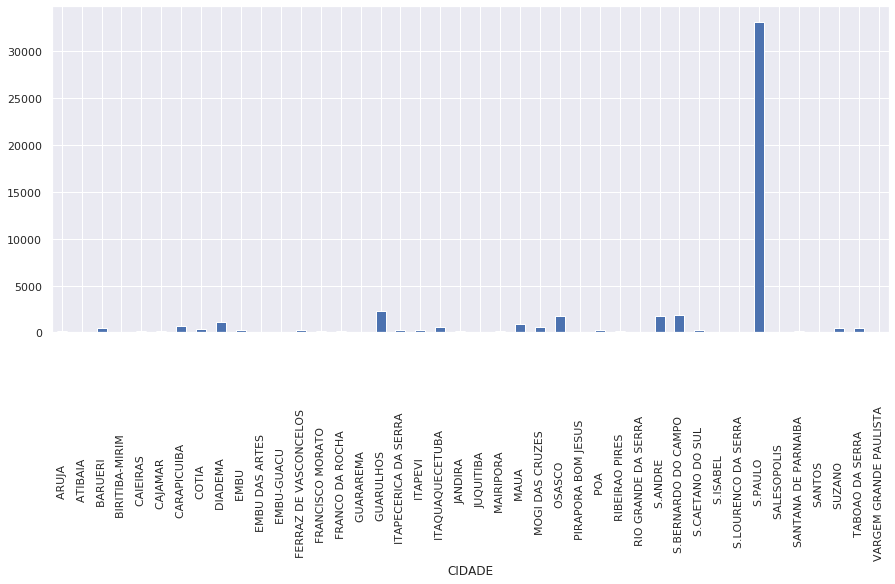

In [33]:
plt.figure(figsize=(15,6))
plot = tmp.groupby("CIDADE")['RUBRICA'].count().plot(kind = 'bar')